In [1]:
import re
import locale
import pandas as pd
import requests
import os

from bs4 import BeautifulSoup

# pd.set_option('display.max_rows', 100)

# Configura o locale para o formato de número brasileiro
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

'pt_BR.utf8'

In [2]:
def obter_texto_visivel(url):
    try:
        # Fazer a solicitação HTTP para a URL
        response = requests.get(url)
        response.raise_for_status()  # Verificar se a solicitação foi bem-sucedida

        # Criar um objeto BeautifulSoup para analisar o conteúdo HTML
        soup = BeautifulSoup(response.content, 'html.parser', from_encoding="utf-8")

        # Extrair o texto visível da página (excluindo o HTML)
        texto_visivel = soup.get_text()

        return texto_visivel
    except requests.exceptions.RequestException as e:
        print(f"Erro ao obter a página: {e}")
        return None

In [3]:
def textFromURL(url):
    try:
        # Fazer a solicitação HTTP para a URL
        response = requests.get(url)

        # Verificar se a solicitação foi bem-sucedida
        response.raise_for_status()  

        # Criar um objeto BeautifulSoup para analisar o conteúdo HTML
        soup = BeautifulSoup(response.content, 'html.parser', from_encoding="utf-8")

        # Extrair o texto visível da página (excluindo o HTML)
        texto_visivel = soup.get_text()

        # separa as linhas, e limpa os espaços iniciais, e tabulações
        linhas = [linha.replace("\t"," ").strip() for linha in texto_visivel.split("\n")]

        # junta o texto
        return "\n".join(linhas)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao obter a página: {e}")
        return None

In [4]:
url = 'https://sisgvarmazenamento.blob.core.windows.net/prd/PublicacaoPortal/Arquivos/202307.htm'
texto = textFromURL(url)

custos = []
for resultado in re.finditer(r"Vereador\(a\): (( |\.|\w+)*)\n(.+?)(?=Vereador)", texto, re.DOTALL):
    nome_vereador = resultado.group(1)
    dados = texto[resultado.start():resultado.end()]
    if "VEREADOR AFASTADO" in dados:
        continue

    total = re.search(r"TOTAL DO MÊS\s+([\d.,]+)", dados)
    if total:
        valor = locale.atof(total.group(1))
        custos.append({nome_vereador: valor})
        print(valor, "\t", nome_vereador)
    else:
        print(nome_vereador, dados)

custos

3432.14 	 ADILSON AMADEU
33930.21 	 ALESSANDRO GUEDES
17038.76 	 ANDRÉ SANTOS
20810.49 	 ARSELINO TATTO
22464.58 	 ATILIO FRANCISCO
17062.8 	 AURELIO NOMURA
42063.67 	 BETO DO SOCIAL
27745.78 	 BOMBEIRO MAJOR PALUMBO
24430.3 	 CAMILO CRISTÓFARO
20670.96 	 CELSO GIANNAZI
13086.61 	 CORONEL SALLES
16188.32 	 CRIS MONTEIRO
22436.91 	 DANILO DO POSTO DE SAÚDE
29006.66 	 DR SIDNEY CRUZ
13690.67 	 DR. NUNES PEIXEIRO
32050.62 	 EDIR SALES
19202.36 	 ELAINE DO QUILOMBO PERIFÉRICO
24989.54 	 ELI CORRÊA
23610.32 	 ELISEU GABRIEL
12296.18 	 ELY TERUEL
16816.03 	 FABIO RIVA
16557.99 	 FERNANDO HOLIDAY
26733.86 	 GEORGE HATO
21783.84 	 GILSON BARRETO
31298.18 	 HÉLIO RODRIGUES
28561.63 	 ISAC FELIX
35163.81 	 JAIR TATTO
37862.89 	 JANAINA LIMA
28130.16 	 JOÃO ANANIAS
32348.25 	 JOÃO JORGE
14690.48 	 JORGE WILSON FILHO
28844.94 	 JUSSARA BASSO
28232.76 	 LUANA ALVES
26529.82 	 LUNA ZARATTINI
23929.56 	 MANOEL DEL RIO
33958.12 	 MARCELO MESSIAS
24608.94 	 MARLON DO UBER
10831.51 	 MILTON FERREIRA
583

[{'ADILSON AMADEU': 3432.14},
 {'ALESSANDRO GUEDES': 33930.21},
 {'ANDRÉ SANTOS': 17038.76},
 {'ARSELINO TATTO': 20810.49},
 {'ATILIO FRANCISCO': 22464.58},
 {'AURELIO NOMURA': 17062.8},
 {'BETO DO SOCIAL': 42063.67},
 {'BOMBEIRO MAJOR PALUMBO': 27745.78},
 {'CAMILO CRISTÓFARO': 24430.3},
 {'CELSO GIANNAZI': 20670.96},
 {'CORONEL SALLES': 13086.61},
 {'CRIS MONTEIRO': 16188.32},
 {'DANILO DO POSTO DE SAÚDE': 22436.91},
 {'DR SIDNEY CRUZ': 29006.66},
 {'DR. NUNES PEIXEIRO': 13690.67},
 {'EDIR SALES': 32050.62},
 {'ELAINE DO QUILOMBO PERIFÉRICO': 19202.36},
 {'ELI CORRÊA': 24989.54},
 {'ELISEU GABRIEL': 23610.32},
 {'ELY TERUEL': 12296.18},
 {'FABIO RIVA': 16816.03},
 {'FERNANDO HOLIDAY': 16557.99},
 {'GEORGE HATO': 26733.86},
 {'GILSON BARRETO': 21783.84},
 {'HÉLIO RODRIGUES': 31298.18},
 {'ISAC FELIX': 28561.63},
 {'JAIR TATTO': 35163.81},
 {'JANAINA LIMA': 37862.89},
 {'JOÃO ANANIAS': 28130.16},
 {'JOÃO JORGE': 32348.25},
 {'JORGE WILSON FILHO': 14690.48},
 {'JUSSARA BASSO': 28844.94}

In [5]:
custos.sort(key=lambda item: item[list(item.keys())[0]],reverse=True)
custos

[{'BETO DO SOCIAL': 42063.67},
 {'JANAINA LIMA': 37862.89},
 {'JAIR TATTO': 35163.81},
 {'TONINHO VESPOLI': 34946.11},
 {'MARCELO MESSIAS': 33958.12},
 {'ALESSANDRO GUEDES': 33930.21},
 {'RODOLFO DESPACHANTE': 33324.25},
 {'JOÃO JORGE': 32348.25},
 {'RINALDI DIGILIO': 32291.36},
 {'SENIVAL MOURA': 32244.84},
 {'EDIR SALES': 32050.62},
 {'HÉLIO RODRIGUES': 31298.18},
 {'DR SIDNEY CRUZ': 29006.66},
 {'JUSSARA BASSO': 28844.94},
 {'ISAC FELIX': 28561.63},
 {'LUANA ALVES': 28232.76},
 {'JOÃO ANANIAS': 28130.16},
 {'BOMBEIRO MAJOR PALUMBO': 27745.78},
 {'GEORGE HATO': 26733.86},
 {'LUNA ZARATTINI': 26529.82},
 {'RICARDO TEIXEIRA': 25394.18},
 {'SILVIA DA BANCADA FEMINISTA': 25028.17},
 {'ELI CORRÊA': 24989.54},
 {'MARLON DO UBER': 24608.94},
 {'CAMILO CRISTÓFARO': 24430.3},
 {'MANOEL DEL RIO': 23929.56},
 {'ELISEU GABRIEL': 23610.32},
 {'ATILIO FRANCISCO': 22464.58},
 {'DANILO DO POSTO DE SAÚDE': 22436.91},
 {'RUTE COSTA': 22145.51},
 {'GILSON BARRETO': 21783.84},
 {'ARSELINO TATTO': 20810.

In [16]:
ano = {}
for n in range(1, 9, 1):
    file = f"2023{n:02d}"
    fileTXT = f"dados-{file}.txt"
    if os.path.exists(fileTXT):
        with open(fileTXT, "r", encoding="utf-8") as file:
            texto = file.readlines()
            file.close()
        texto = "".join(texto)
    else:
        url = f'https://sisgvarmazenamento.blob.core.windows.net/prd/PublicacaoPortal/Arquivos/{file}.htm'
        texto = textFromURL(url)
        with open(fileTXT, "w+", encoding="utf-8") as file:
            file.write(texto)
            file.close()

    for resultado in re.finditer(r"Vereador\(a\): (( |\.|\w+)*)\n(.+?)(?=Vereador)", texto, re.DOTALL):
        nome_vereador = resultado.group(1)
        if nome_vereador not in ano:
            ano[nome_vereador] = {"afastado": False}

        dados = texto[resultado.start():resultado.end()]
        if "VEREADOR AFASTADO" in dados:
            ano[nome_vereador]["afastado"] = True
            continue

        total = re.search(r"TOTAL DO MÊS\s+([\d.,]+)", dados)
        if total:
            valor = locale.atof(total.group(1))

            ano[nome_vereador][f"mes{n}"] = valor
ano

{'ADILSON AMADEU': {'afastado': False,
  'mes1': 3778.6,
  'mes2': 12170.89,
  'mes3': 4104.51,
  'mes4': 8518.69,
  'mes5': 43140.23,
  'mes6': 18122.71,
  'mes7': 3432.14,
  'mes8': 4719.36},
 'ALESSANDRO GUEDES': {'afastado': False,
  'mes1': 29392.35,
  'mes2': 28701.01,
  'mes3': 27023.94,
  'mes4': 25395.69,
  'mes5': 27773.76,
  'mes6': 23509.54,
  'mes7': 33930.21,
  'mes8': 27407.17},
 'ANDRÉ SANTOS': {'afastado': False,
  'mes1': 28304.03,
  'mes2': 18842.63,
  'mes3': 29981.71,
  'mes4': 16092.49,
  'mes5': 18396.37,
  'mes6': 18960.05,
  'mes7': 17038.76,
  'mes8': 32620.72},
 'ARSELINO TATTO': {'afastado': False,
  'mes1': 20695.96,
  'mes2': 19881.33,
  'mes3': 21437.47,
  'mes4': 23286.64,
  'mes5': 20536.02,
  'mes6': 17351.03,
  'mes7': 20810.49,
  'mes8': 15771.51},
 'ATILIO FRANCISCO': {'afastado': False,
  'mes1': 22502.54,
  'mes2': 26849.15,
  'mes3': 29436.92,
  'mes4': 28475.71,
  'mes5': 28587.13,
  'mes6': 26970.31,
  'mes7': 22464.58,
  'mes8': 28461.74},
 'A

In [17]:
df = pd.DataFrame.from_dict(ano, orient='index')
df.reset_index(inplace=True)
df.rename(columns={'index': 'vereador'}, inplace=True)
df.fillna(0, inplace=True)
df['total'] = df.iloc[:, -5:].sum(axis=1)
df = df[df['afastado'] == False]
df = df.drop('afastado', axis=1)
df = df.sort_values(by='total', ascending=False)
df = df.reset_index(drop=True)
df

,vereador,mes1,mes2,mes3,mes4,mes5,mes6,mes7,mes8,total
0,RODOLFO DESPACHANTE,1367.62,27927.23,38313.87,46948.15,45960.09,30504.19,33324.25,31909.61,188646.29
1,BETO DO SOCIAL,0.00,0.00,919.06,25363.22,31999.76,43914.78,42063.67,32125.81,175467.24
2,EDIR SALES,32118.75,20437.70,29623.07,32988.37,39319.99,38224.62,32050.62,27594.31,170177.91
3,JOÃO JORGE,26744.85,28063.26,34526.11,34401.89,32510.75,33590.02,32348.25,33397.23,166248.14
4,ELI CORRÊA,24266.41,25701.64,27078.57,25594.96,41898.04,25431.65,24989.54,42743.28,160657.47
5,SENIVAL MOURA,30326.25,30206.70,30070.38,31930.11,30654.66,30319.38,32244.84,30090.64,155239.63
6,LUANA ALVES,25236.11,31984.40,36838.80,34414.89,31549.55,31189.15,28232.76,23943.28,149329.63
7,ISAC FELIX,17572.46,30136.76,41415.87,34379.90,29449.85,34605.97,28561.63,17369.60,144366.95
8,ELISEU GABRIEL,15430.96,43983.94,36941.35,31150.41,29450.14,29474.06,23610.32,30165.85,143850.78
9,GEORGE HATO,29803.01,34162.71,30952.28,29952.54,34172.14,28082.52,26733.86,20443.96,139385.02


In [19]:
df.values[3]

array(['JOÃO JORGE', 26744.85, 28063.26, 34526.11, 34401.89, 32510.75,
       33590.02, 32348.25, 33397.23, 166248.14], dtype=object)

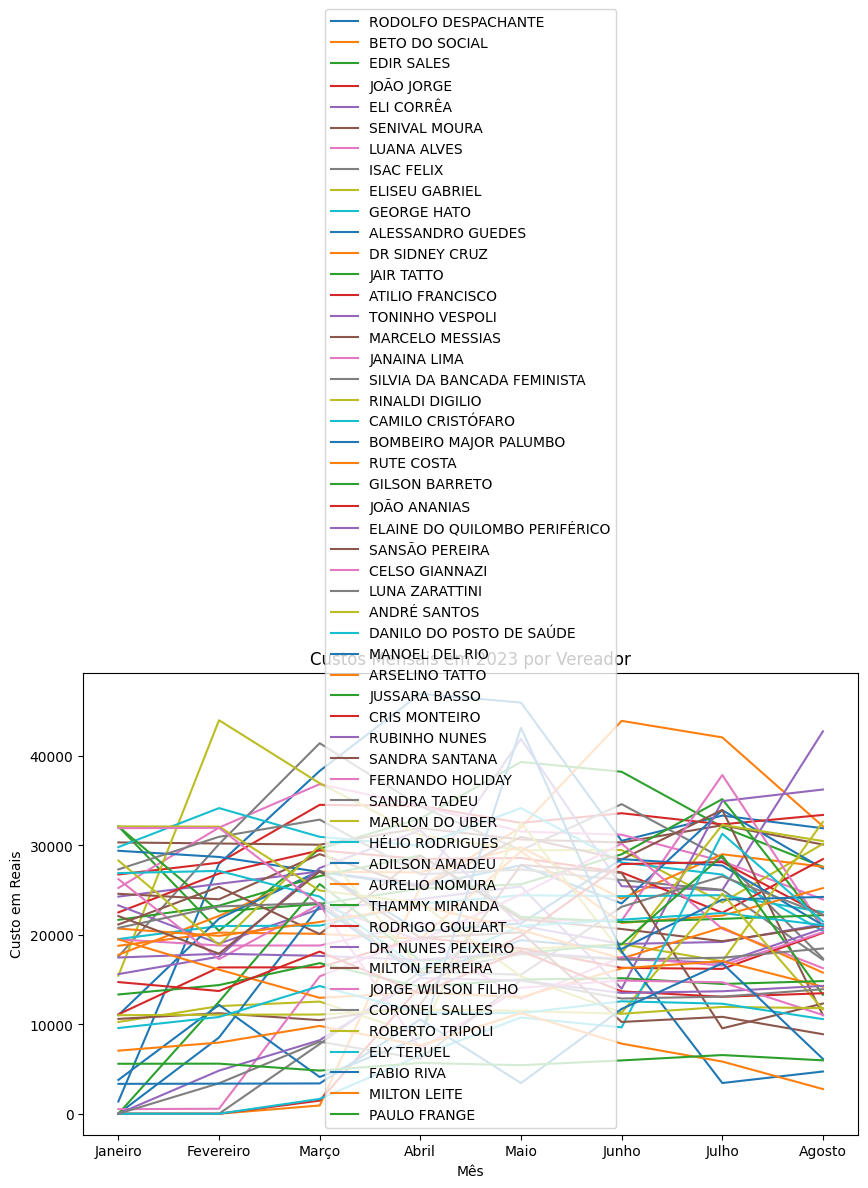

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Dados fictícios de custos mensais (substitua pelos seus próprios dados)
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho','Julho','Agosto']


# Criar um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura (opcional)

for linha in df.values:
    plt.plot(meses, linha[1:-1], label=linha[0])

plt.xlabel('Mês')  # Rótulo do eixo x
plt.ylabel('Custo em Reais')  # Rótulo do eixo y
plt.title('Custos Mensais em 2023 por Vereador')  # Título do gráfico
plt.legend()  # Adicionar legenda

# Exibir o gráfico
plt.show()
